<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 18, 2016: `log` $g$ poly
<br>November 16, 2016: `expt` $g$ poly and $H$ matrix
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Pascal array $\mathcal{P}$.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha, beta

init_printing()

In [16]:
%run ../../src/matrix_functions.py

In [61]:
%run ../../src/sequences.py

# Pascal array $\mathcal{P}$

In [3]:
m=8

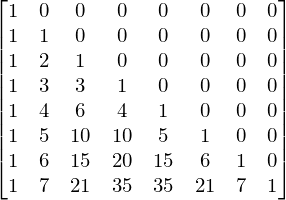

In [75]:
P = Matrix(m,m,binomial)
P

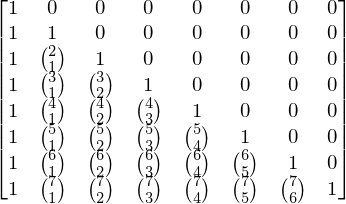

In [5]:
P = Matrix(m,m, lambda n,k: binomial(n, k, evaluate=k >= n or not k))
P

In [6]:
data, eigenvals, multiplicities = eigendata = eigen_data(P)
eigendata

In [7]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

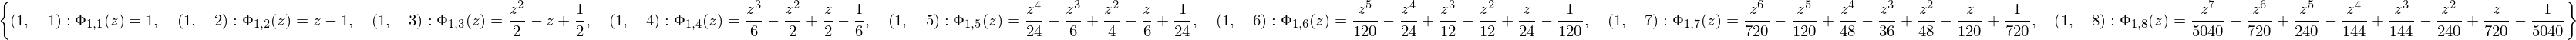

In [8]:
Phi_polynomials = component_polynomials_riordan(m)
Phi_polynomials

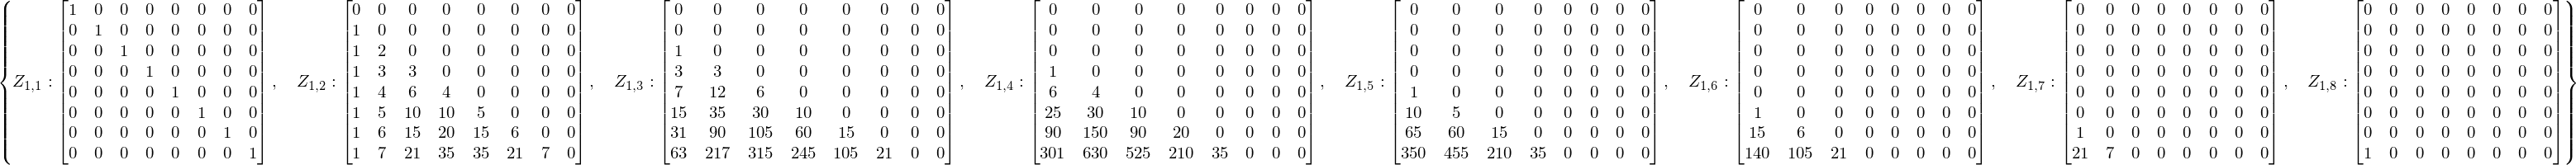

In [9]:
Z = IndexedBase('Z')

cmatrices = component_matrices(P, Phi_polynomials)
{Z[k]:v for k,v in cmatrices.items()}

## `inverse` function

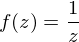

In [76]:
f, h = Function('f'), Function('h')
f_inverse = define(let=f(z), be=1/(z))
f_inverse

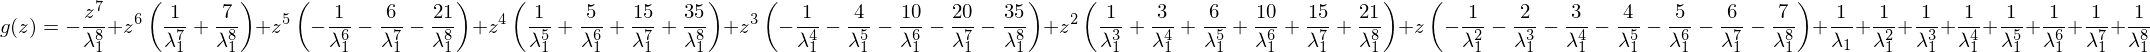

In [77]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [78]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

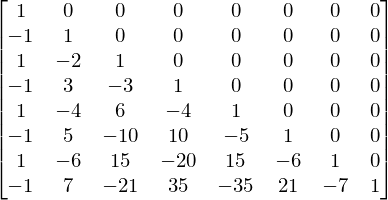

In [79]:
with lift_to_matrix_function(g_inverse) as g_inverse:
    P_inverse = g_inverse(P)
P_inverse

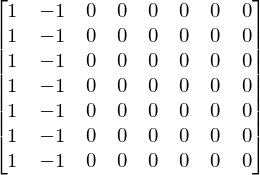

In [80]:
Asequence(P_inverse)

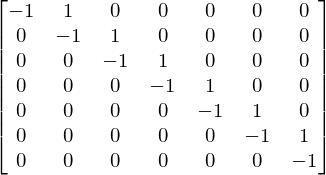

In [81]:
production_matrix_ordinary(P_inverse)

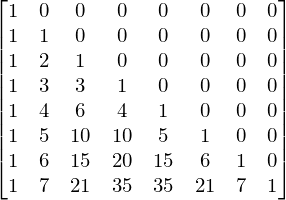

In [16]:
g_inverse(P_inverse)

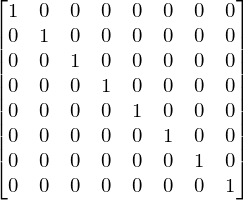

In [16]:
P_inverse * P

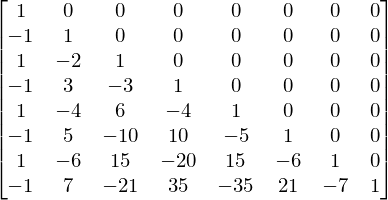

In [17]:
P**(-1)

## `power` function

In [82]:
f = Function('f')
f_power = define(let=f(z), be=z**r)
f_power

In [83]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)
#g_power

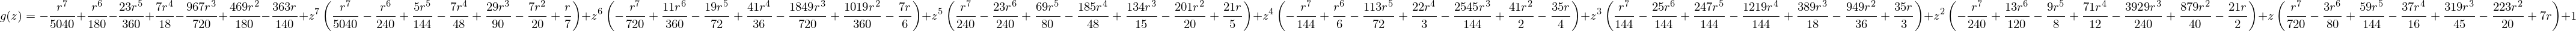

In [84]:
g_power = g_power.subs(eigenvals)
g_power

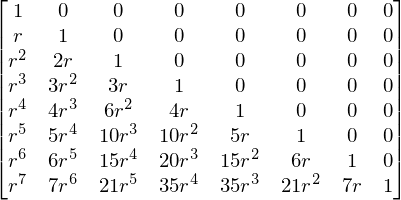

In [85]:
with lift_to_matrix_function(g_power) as g_power:
    m_power = g_power(P)
m_power

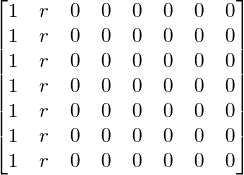

In [86]:
Asequence(m_power)

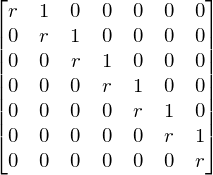

In [87]:
production_matrix_ordinary(m_power)

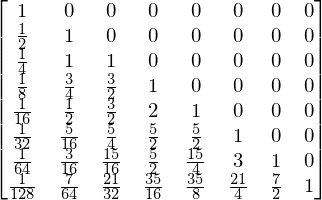

In [24]:
m_power.subs({r:S(1)/2})

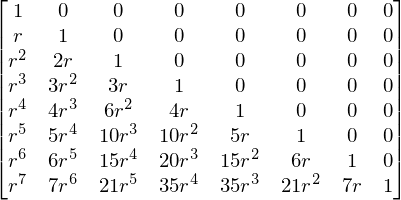

In [25]:
(P**r).applyfunc(simplify)

## `sqrt` function

In [11]:
f = Function('f')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

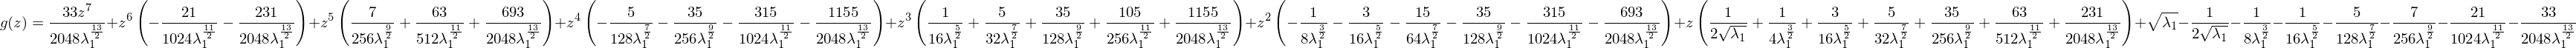

In [12]:
g_sqrt = g_poly(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

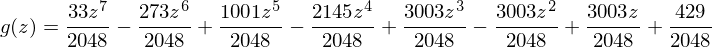

In [13]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

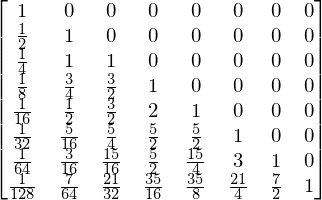

In [14]:
with lift_to_matrix_function(g_sqrt) as g_sqrt:
    m_sqrt = g_sqrt(P)
m_sqrt

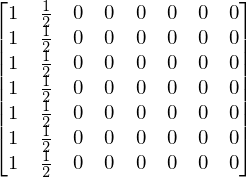

In [58]:
Asequence(m_sqrt)

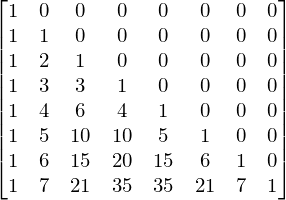

In [35]:
Matrix(m, m, lambda i, j: m_sqrt[i,j]*(2**(i-j)))

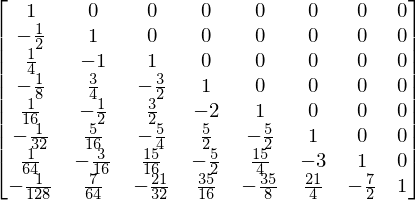

In [36]:
g_inverse(P)*m_sqrt

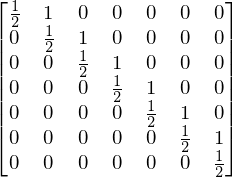

In [62]:
production_matrix_ordinary(m_sqrt)

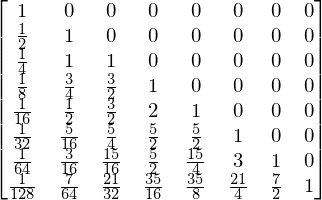

In [30]:
P**(S(1)/2)

## `expt` function

In [22]:
f = Function('f')
f_expt = define(let=f(z), be=exp(alpha*z))
f_expt

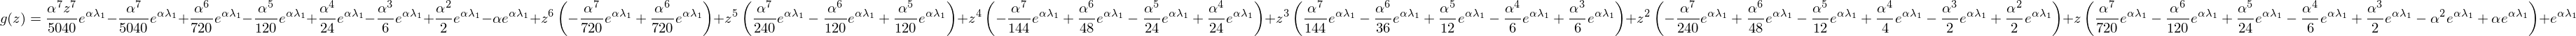

In [23]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
g_expt

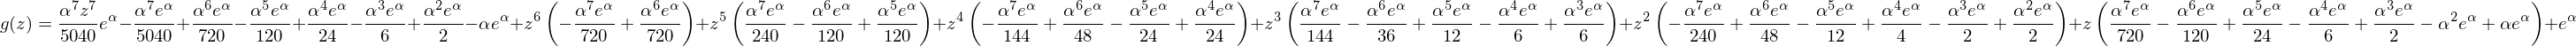

In [24]:
g_expt = g_expt.subs(eigenvals)
g_expt

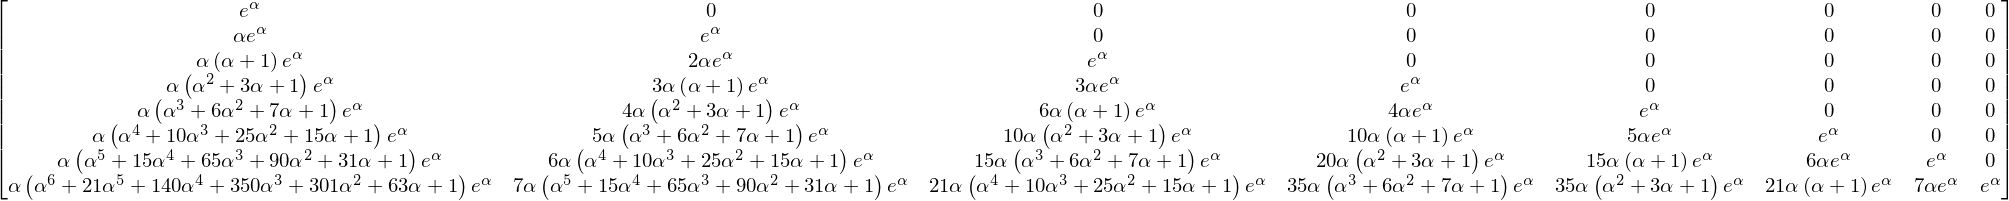

In [25]:
with lift_to_matrix_function(g_expt) as g_expt:
    P_expt = g_expt(P)
P_expt

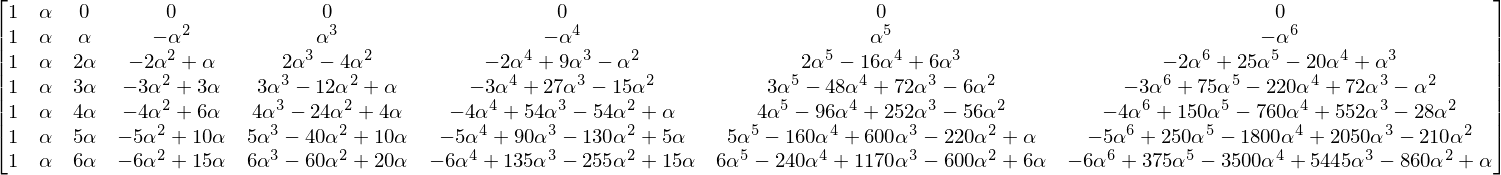

In [73]:
Asequence(P_expt)

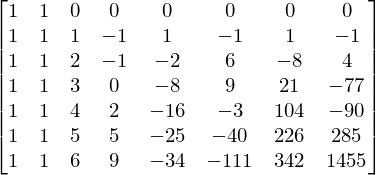

In [74]:
_.subs({alpha:1})

In [64]:
PM_expt = production_matrix_ordinary(P_expt)

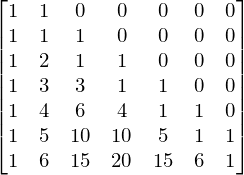

In [72]:
PM_expt.subs({alpha:1})

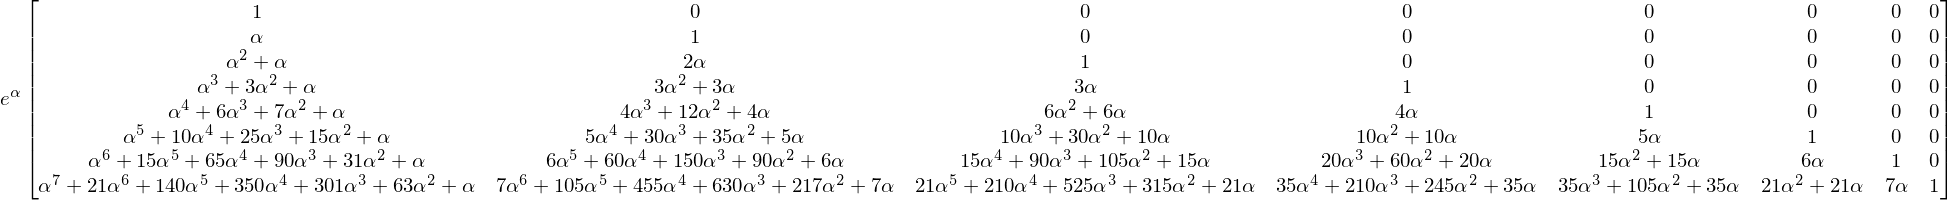

In [27]:
simp_P_expt = Mul(exp(alpha), P_expt.applyfunc(lambda c: (c/exp(alpha)).expand()), evaluate=False)
simp_P_expt

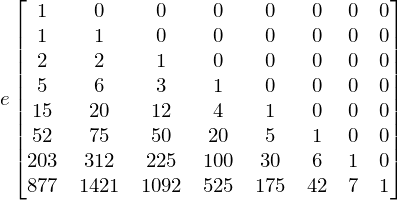

In [18]:
simp_P_expt.subs({alpha:1})

In [88]:
from sympy.functions.combinatorial.numbers import stirling

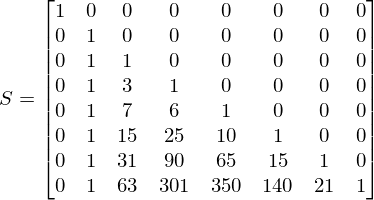

In [89]:
S = Matrix(m, m, lambda n,k: stirling(n,k, kind=2))
Eq(Symbol('S'), S, evaluate=False)

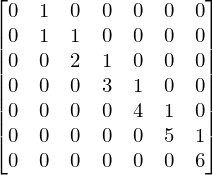

In [91]:
production_matrix_ordinary(S)

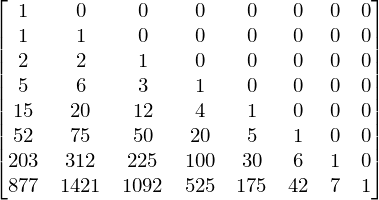

In [90]:
S*P*S**(-1)

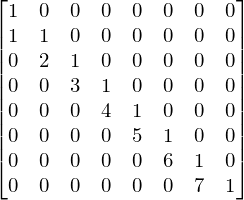

In [22]:
S**(-1)*P*S

### Exercise 5.6

In [8]:
d = IndexedBase('d')
h = IndexedBase('h')

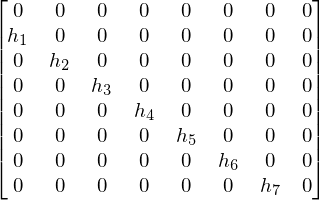

In [9]:
H = Matrix(m, m, lambda n, k: h[n] if n==k+1 else 0 if n == k-1 else 0)
H

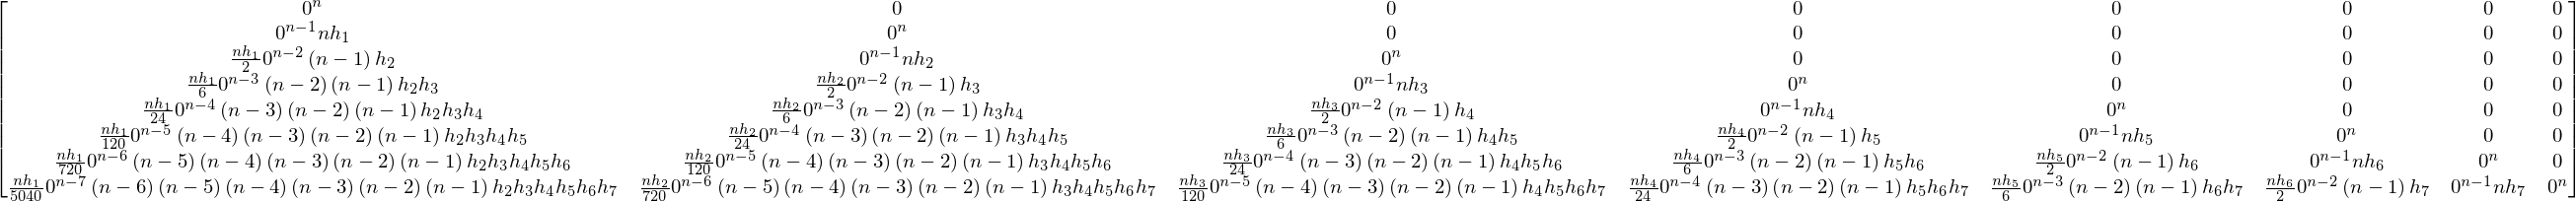

In [23]:
H**n

In [25]:
unit = Matrix(m, 1, unit_vector(3, offset=0))
unit

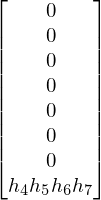

In [22]:
H**4*unit

In [58]:
f = Function('f')
alpha, beta, gamma = symbols(r'\alpha \beta \gamma')
f_expt = define(let=f(z), be=exp((alpha+beta)*z))
f_expt

In [59]:
data, eigenvals, multiplicities = eigendata = eigen_data(H)
eigendata

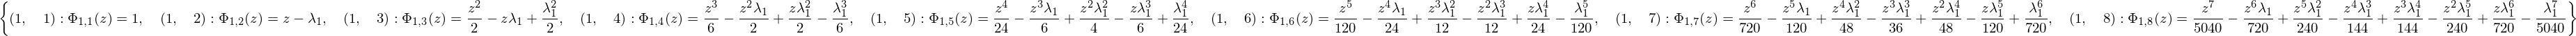

In [60]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

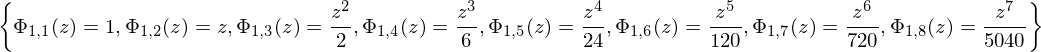

In [61]:
{poly_def.subs(eigenvals) for (i,j), poly_def in Phi_polynomials.items()}

In [62]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
#g_expt

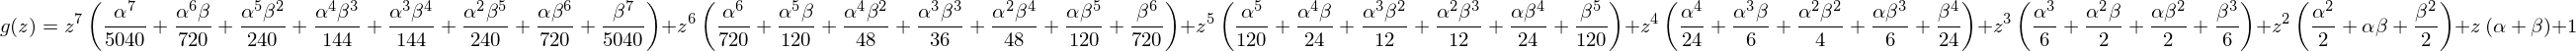

In [63]:
g_expt = g_expt.subs(eigenvals)
g_expt

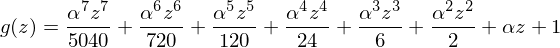

In [64]:
g_expt.subs({beta:0})

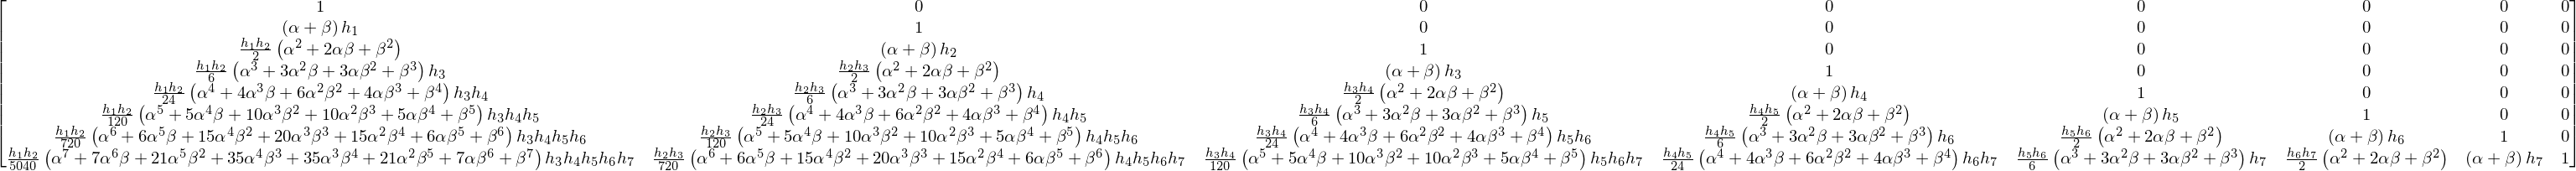

In [65]:
with lift_to_matrix_function(g_expt) as g_expt:
    H_expt = g_expt(H)
H_expt

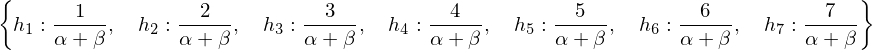

In [66]:
constraints = [Eq(H_expt[n,k],P[n,k]) for n in range(m) for k in range(n)]
sol, *rest = solve(constraints,  [h[i] for i in range(1,m)], dict=True)
sol

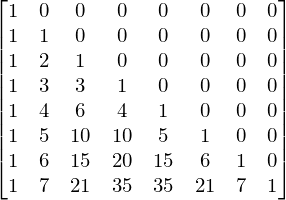

In [68]:
H_expt.subs(sol).applyfunc(simplify)

In [24]:
{i:factorial(i, ) for i in range(11)}

## `log` function

In [46]:
f = Function('f')
f_log = define(let=f(z), be=log(z))
f_log

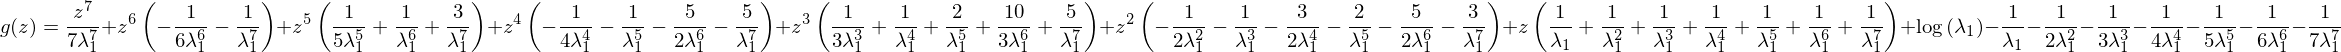

In [47]:
g_log = g_poly(f_log, eigendata, Phi_polynomials)
g_log

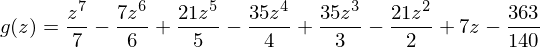

In [48]:
g_log = g_log.subs(eigenvals)
g_log

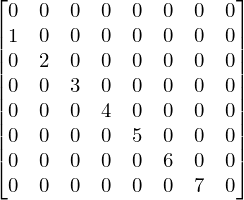

In [49]:
with lift_to_matrix_function(g_log) as g_log:
    P_log = g_log(P)
P_log

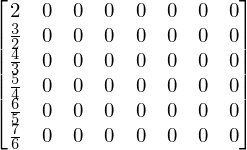

In [51]:
Asequence(P_log[1:,:])

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.